In [2]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Balanced before Entropy Balancing
df_PA_control_before = pd.read_csv("testdata/2.PA_control.csv")
df_QOL_control_before = pd.read_csv("testdata/2.QOL_control.csv")
df_Pain_control_before= pd.read_csv("testdata/2.Pain_control.csv")

# Treatment
dfg_PA_treatment = pd.read_csv("testdata/2.PA_treatment.csv")
dfg_QOL_treatment = pd.read_csv("testdata/2.QOL_treatment.csv")
dfg_Pain_treatment = pd.read_csv("testdata/2.Pain_treatment.csv")

In [4]:
dfg_PA_treatment

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Pain,Baseline_Quality_of_life,PA_change
0,50,2,22.68,1,1.0,10.0,65.0,31.25,0.0
1,45,1,29.07,1,1.0,7.0,96.0,25.00,3.0
2,46,2,26.10,1,1.0,3.0,39.0,68.75,6.0
3,53,2,28.03,1,1.0,4.0,15.0,62.50,0.0
4,68,2,27.82,1,1.0,8.0,15.0,87.50,2.0
...,...,...,...,...,...,...,...,...,...
7598,55,2,35.63,1,1.0,8.0,57.0,50.00,2.0
7599,61,2,29.34,1,1.0,3.0,55.0,25.00,3.0
7600,62,1,25.88,1,1.0,3.0,26.0,50.00,0.0
7601,47,2,26.51,1,1.0,4.0,47.0,43.75,-2.0


In [5]:
print("Shapes of the dataframes:")
print("df_PA_control shape:", df_PA_control_before.shape)
print("df_QOL_control shape:", df_QOL_control_before.shape)
print("df_Pain_control shape:", df_Pain_control_before.shape)
print("dfg_PA_treatment shape:", dfg_PA_treatment.shape)
print("dfg_QOL_treatment shape:", dfg_QOL_treatment.shape)
print("dfg_Pain_treatment shape:", dfg_Pain_treatment.shape)

Shapes of the dataframes:
df_PA_control shape: (1156, 9)
df_QOL_control shape: (1156, 9)
df_Pain_control shape: (1156, 9)
dfg_PA_treatment shape: (7603, 9)
dfg_QOL_treatment shape: (7603, 9)
dfg_Pain_treatment shape: (7603, 9)


#### Outcomes

##### Physical activity in OAI:

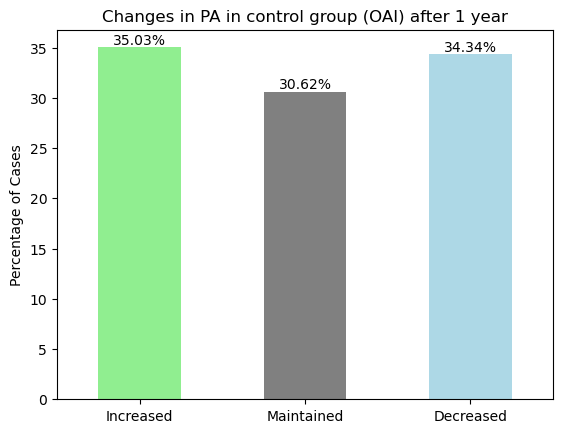

(1156, 10)


In [6]:
# Define the function to categorize PA_changes
def categorize_change(PA_change):
    if PA_change > 0:
        return 'Increased'
    elif PA_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize PA_changes
df_PA_control_before['PA_change_category'] = df_PA_control_before['PA_change'].apply(categorize_change)

# Calculate counts for each category of PA_change
change_counts = df_PA_control_before['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Changes in PA in control group (OAI) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased', 'Maintained', 'Decreased'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()
print(df_PA_control_before.shape)


##### Physical activity in GLA:D

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_76170/1937518794.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')


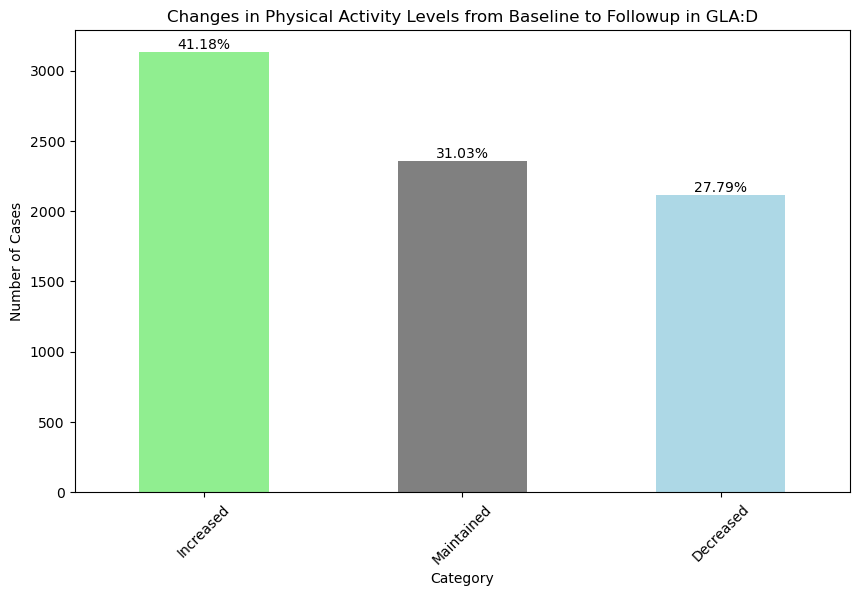

In [7]:
# Categorize the PA_changes
dfg_PA_treatment['PA_change_category'] = pd.cut(dfg_PA_treatment['PA_change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
                               labels=['Decreased', 'Maintained', 'Increased'])

# Ensure the order: Increased, Maintained, Decreased
order = ['Increased', 'Maintained', 'Decreased']

# Count the number of cases in each category, reindex to ensure order
PA_change_counts = dfg_PA_treatment['PA_change_category'].value_counts().reindex(order)

# Calculate percentages
total = PA_change_counts.sum()
percentages = (PA_change_counts / total * 100).round(2)

# Specify colors for each category
colors = ['lightgreen', 'grey', 'lightblue']

# Visualize the results with a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
PA_change_counts.plot(kind='bar', color=colors, ax=ax)
plt.title('Changes in Physical Activity Levels from Baseline to Followup in GLA:D')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=45)

# Annotate each bar with the percentage of cases
for i, value in enumerate(PA_change_counts.values):
    ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')

plt.show()


In [8]:
dfg_PA_treatment.shape

(7603, 10)

##### In one Plot

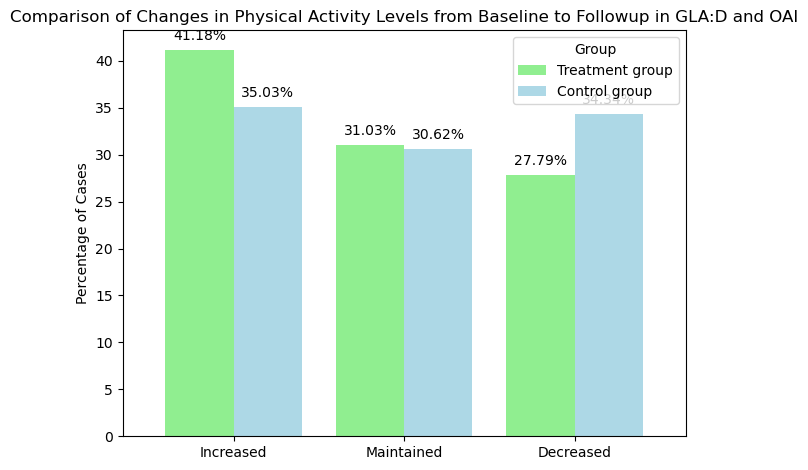

In [9]:
# Define the function to categorize PA_changes for treatment group
def categorize_PA_change(PA_change):
    if PA_change > 0:
        return 'Increased'
    elif PA_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize PA_changes for treatment group
dfg_PA_treatment['PA_change_category'] = dfg_PA_treatment['PA_change'].apply(categorize_PA_change)

# Count the number of cases in each category for treatment group
PA_change_counts_treatment = dfg_PA_treatment['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages for treatment group
total_treatment = PA_change_counts_treatment.sum()
percentages_treatment = (PA_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize PA_changes for control group
df_PA_control_before['PA_change_category'] = df_PA_control_before['PA_change'].apply(categorize_PA_change)

# Count the number of cases in each category for control group
PA_change_counts_control = df_PA_control_before['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages for control group
total_control = PA_change_counts_control.sum()
percentages_control = (PA_change_counts_control / total_control * 100).round(2)

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment group': percentages_treatment,
    'Control group': percentages_control
}, index=['Increased', 'Maintained', 'Decreased'])

# Plot
ax = comparison_df.plot(kind='bar', color=['lightgreen', 'lightblue'], width=0.8)

plt.title('Comparison of Changes in Physical Activity Levels from Baseline to Followup in GLA:D and OAI')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


##### Quality of life in OAI

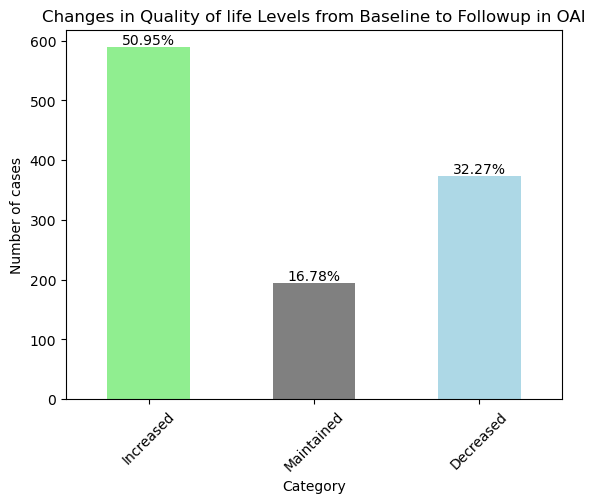

In [10]:
# Define the function to categorize QOL_changes
def QOL_categorize_change(QOL_change):
    if QOL_change > 0:
        return 'Increased'
    elif QOL_change < 0:
        return 'Decreased'
    
    else:
        return 'Maintained'

# Apply the function to categorize QOL_changes
df_QOL_control_before['QOL_change_category'] = df_QOL_control_before['QOL_change'].apply(QOL_categorize_change)

# Calculate counts for each category of QOL_change
change_counts = df_QOL_control_before['QOL_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Changes in Quality of life Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Quality of life in OAI: changes of at least 10 points

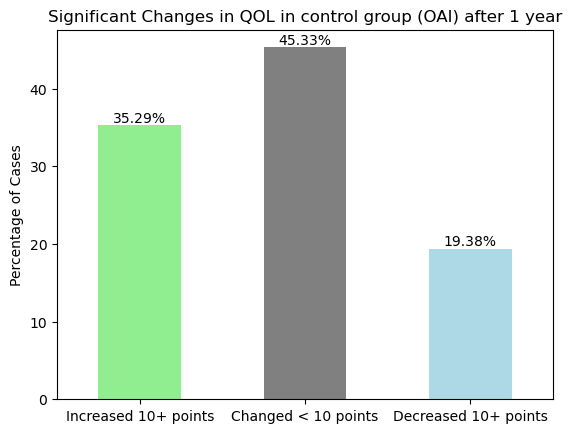

In [11]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes
df_QOL_control_before['QOL_significant_change_category'] = df_QOL_control_before['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change
change_counts = df_QOL_control_before['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Significant Changes in QOL in control group (OAI) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased 10+ points', 'Changed < 10 points', 'Decreased 10+ points'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### Quality of life in GLAD

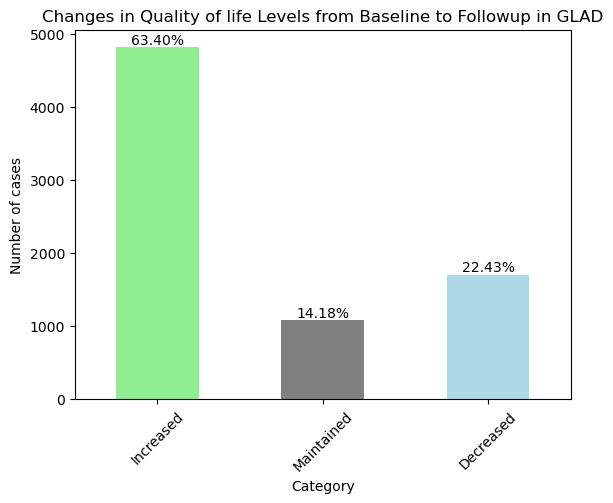

In [12]:
# Define the function to categorize changes
def QOL_categorize_change(QOL_change):
    if QOL_change > 0:
        return 'Increased'
    elif QOL_change < 0:
        return 'Decreased'
    
    else:
        return 'Maintained'

# Apply the function to categorize QOL_changes
dfg_QOL_treatment['QOL_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_change)

# Calculate counts for each category of QOL_change
QOL_change_counts = dfg_QOL_treatment['QOL_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Plot
ax = QOL_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Changes in Quality of life Levels from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = QOL_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Quality of life in GLAD: changes of at least 10 point

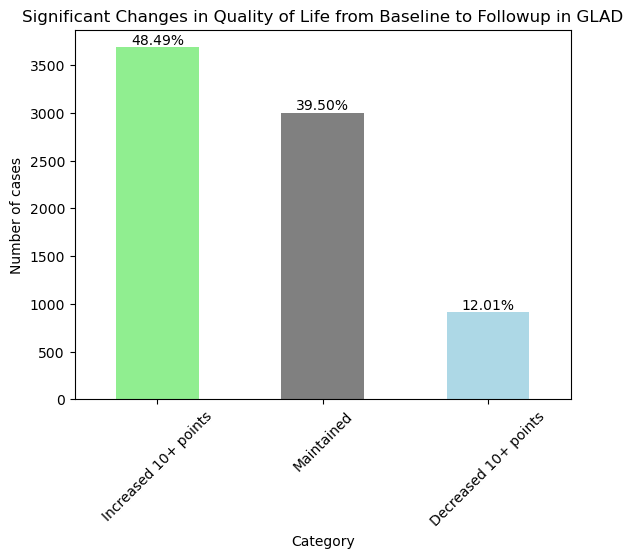

In [13]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes
dfg_QOL_treatment['QOL_significant_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change
QOL_significant_change_counts = dfg_QOL_treatment['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Plot
ax = QOL_significant_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Significant Changes in Quality of Life from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = QOL_significant_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### In one Plot

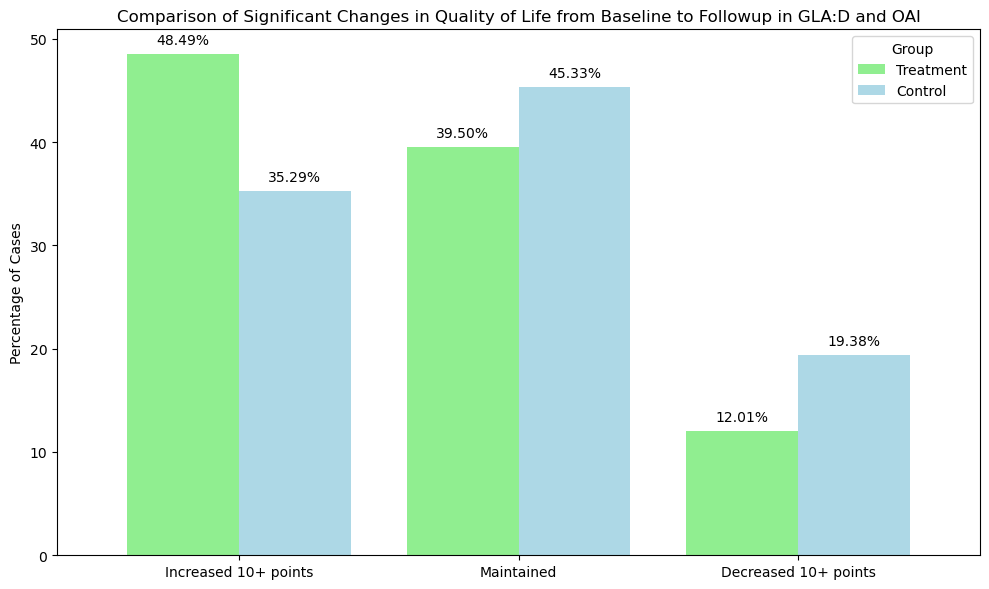

In [14]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes for treatment group
dfg_QOL_treatment['QOL_significant_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for treatment group
QOL_significant_change_counts_treatment = dfg_QOL_treatment['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for treatment group
total_treatment = QOL_significant_change_counts_treatment.sum()
percentages_treatment = (QOL_significant_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize significant QOL_changes for control group
df_QOL_control_before['QOL_significant_change_category'] = df_QOL_control_before['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for control group
QOL_significant_change_counts_control = df_QOL_control_before['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for control group
total_control = QOL_significant_change_counts_control.sum()
percentages_control = (QOL_significant_change_counts_control / total_control * 100).round(2)

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment': percentages_treatment,
    'Control': percentages_control
}, index=['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['lightgreen', 'lightblue'], width=0.8, ax=ax)

plt.title('Comparison of Significant Changes in Quality of Life from Baseline to Followup in GLA:D and OAI')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


##### Pain in OAI

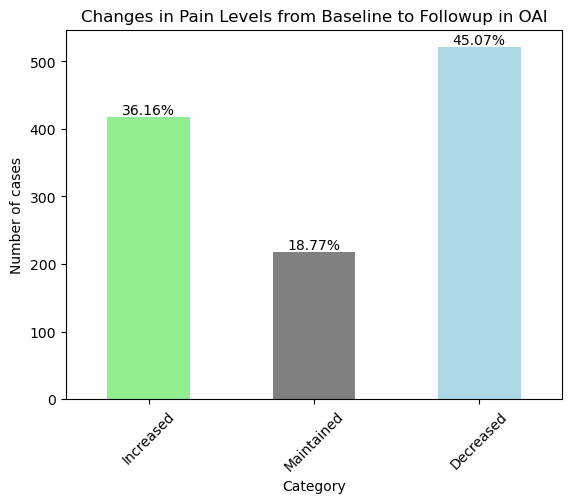

In [15]:
# Define the function to categorize changes
def pain_categorize_change(pain_change):
    if pain_change > 0:
        return 'Increased'
    elif pain_change < 0:
        return 'Decreased'
    
    else:
        return 'Maintained'

# Apply the function to categorize pain_changes
df_Pain_control_before['pain_change_category'] = df_Pain_control_before['pain_change'].apply(pain_categorize_change)

# Calculate counts for each category of pain_change
change_counts = df_Pain_control_before['pain_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Changes in Pain Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in OAI: changes of at least 20 points

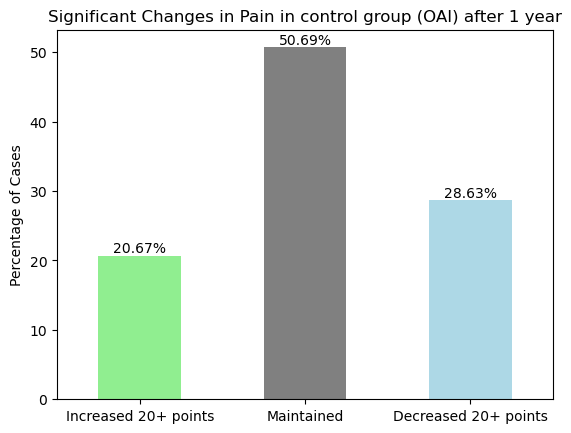

In [16]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'  # This now clearly means the pain changed but less than 20 points either way

# Apply the function to categorize significant pain changes
df_Pain_control_before['pain_significant_change_category'] = df_Pain_control_before['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change
change_counts = df_Pain_control_before['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Significant Changes in Pain in control group (OAI) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### Pain in GLAD

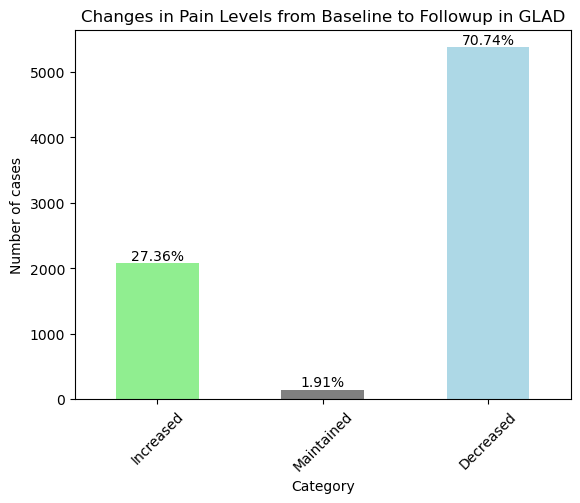

In [17]:
# Define the function to categorize changes
def pain_categorize_change(pain_change):
    if pain_change > 0:
        return 'Increased'
    elif pain_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'  # This now clearly means the pain changed but less than 20 points either way

# Apply the function to categorize pain_changes
dfg_Pain_treatment['pain_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_change)

# Calculate counts for each category of pain_change
pain_change_counts = dfg_Pain_treatment['pain_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Plot
ax = pain_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Changes in Pain Levels from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = pain_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in GLAD: changes of at least 20 points

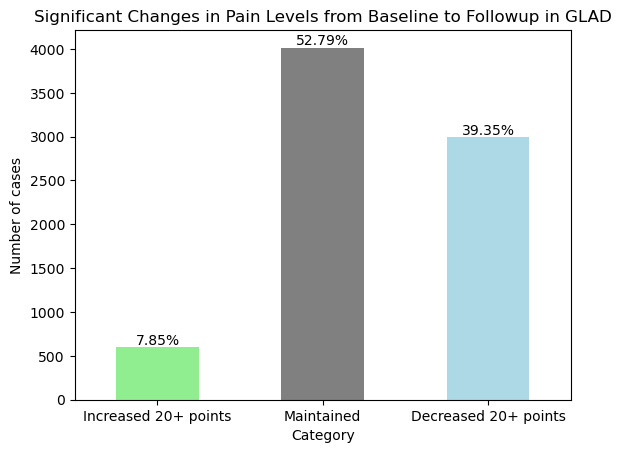

In [18]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'  # This now clearly means the pain changed but less than 20 points either way

# Apply the function to categorize significant pain changes
dfg_Pain_treatment['pain_significant_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change
pain_significant_change_counts = dfg_Pain_treatment['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Plot
ax = pain_significant_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'lightblue'])
plt.title('Significant Changes in Pain Levels from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)

# Calculate the percentages and annotate the bars
total = pain_significant_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


#### In one Plot

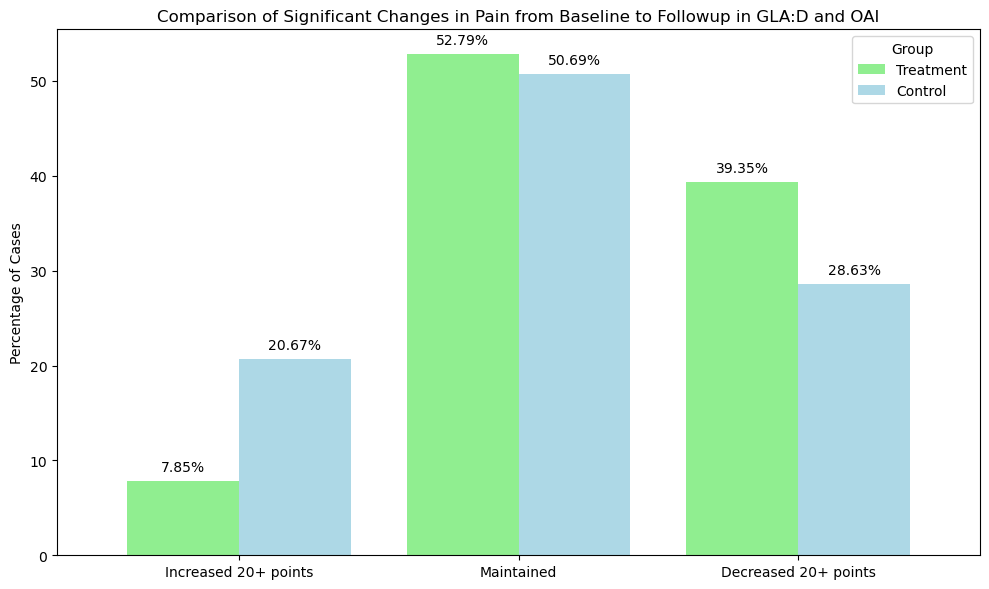

In [19]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant pain changes for treatment group
dfg_Pain_treatment['pain_significant_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for treatment group
pain_significant_change_counts_treatment = dfg_Pain_treatment['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for treatment group
total_treatment = pain_significant_change_counts_treatment.sum()
percentages_treatment = (pain_significant_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize significant pain changes for control group
df_Pain_control_before['pain_significant_change_category'] = df_Pain_control_before['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for control group
pain_significant_change_counts_control = df_Pain_control_before['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for control group
total_control = pain_significant_change_counts_control.sum()
percentages_control = (pain_significant_change_counts_control / total_control * 100).round(2)

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment': percentages_treatment,
    'Control': percentages_control
}, index=['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['lightgreen', 'lightblue'], width=0.8, ax=ax)

plt.title('Comparison of Significant Changes in Pain from Baseline to Followup in GLA:D and OAI')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


#### Analysis

In [20]:
df_PA_control_before.columns

Index(['Age', 'Gender', 'BMI', 'Depression', 'Employment_status',
       'Baseline_Physical_Activity', 'Baseline_Pain',
       'Baseline_Quality_of_life', 'PA_change', 'PA_change_category'],
      dtype='object')

In [21]:
dfg_PA_treatment.Baseline_Physical_Activity.unique()

array([10.,  7.,  3.,  4.,  8.,  5.,  9.,  6.,  2.,  1.])

In [22]:
df_PA_control_before.Baseline_Physical_Activity.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
categorical_vars = ['Gender', 'Depression', 'Employment_status', 'Baseline_Physical_Activity']
continuous_vars = ['Age', 'BMI', 'Baseline_Quality_of_life', 'Baseline_Pain', 'Baseline_Physical_Activity']

# Function to compute min, max, and mean for continuous variables
def compute_continuous_statistics(df, columns):
    stats = {}
    for col in columns:
        stats[col] = {
            'min': df[col].min(),
            'max': df[col].max(),
            'mean': df[col].mean(),
            'std': df[col].std()
        }
    return pd.DataFrame(stats).T

# Function to count cases for categorical variables
def compute_categorical_counts(df, columns):
    counts = {}
    for col in columns:
        counts[col] = df[col].value_counts()
    return counts



In [24]:
dfg_PA_treatment

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Pain,Baseline_Quality_of_life,PA_change,PA_change_category
0,50,2,22.68,1,1.0,10.0,65.0,31.25,0.0,Maintained
1,45,1,29.07,1,1.0,7.0,96.0,25.00,3.0,Increased
2,46,2,26.10,1,1.0,3.0,39.0,68.75,6.0,Increased
3,53,2,28.03,1,1.0,4.0,15.0,62.50,0.0,Maintained
4,68,2,27.82,1,1.0,8.0,15.0,87.50,2.0,Increased
...,...,...,...,...,...,...,...,...,...,...
7598,55,2,35.63,1,1.0,8.0,57.0,50.00,2.0,Increased
7599,61,2,29.34,1,1.0,3.0,55.0,25.00,3.0,Increased
7600,62,1,25.88,1,1.0,3.0,26.0,50.00,0.0,Maintained
7601,47,2,26.51,1,1.0,4.0,47.0,43.75,-2.0,Decreased


In [25]:
dfg_PA_treatment.Baseline_Physical_Activity.unique()

array([10.,  7.,  3.,  4.,  8.,  5.,  9.,  6.,  2.,  1.])

##### Compute statistics for continuous variables in Treatment Group

In [26]:
# Compute statistics for continuous variables in treatment Group
continuous_stats = compute_continuous_statistics(dfg_PA_treatment, continuous_vars)
print("Statistics for continuous variables:")
print(continuous_stats)
print("\n")

Statistics for continuous variables:
                              min     max       mean        std
Age                         23.00   85.00  56.692227   6.818423
BMI                         17.03   72.27  29.592791   5.822314
Baseline_Quality_of_life     0.00  100.00  45.055406  15.094048
Baseline_Pain                0.00  100.00  47.219387  22.310378
Baseline_Physical_Activity   1.00   10.00   5.797843   1.918296




##### Compute statistics for continuous variables in Control Group

In [27]:
# Compute statistics for continuous variables in Control Group
continuous_stats = compute_continuous_statistics(df_PA_control_before, continuous_vars)
print("Statistics for continuous variables:")
print(continuous_stats)
print("\n")

Statistics for continuous variables:
                             min    max       mean        std
Age                         45.0   79.0  61.158304   9.083453
BMI                         18.2   48.7  30.101557   4.800231
Baseline_Quality_of_life     0.0  100.0  51.832829  19.199683
Baseline_Pain                0.0  100.0  50.363322  25.196155
Baseline_Physical_Activity   1.0   10.0   5.662630   1.848932




##### Compute counts for categorical variables in Treatment Group

In [28]:
# Compute counts for categorical variables in treatment Group
categorical_counts = compute_categorical_counts(dfg_PA_treatment, categorical_vars)
print("Counts for categorical variables:")
for var, count in categorical_counts.items():
    print(f"{var}:")
    print(count)
    print("\n")

Counts for categorical variables:
Gender:
Gender
2    5324
1    2279
Name: count, dtype: int64


Depression:
Depression
1    7188
2     314
3      88
4      13
Name: count, dtype: int64


Employment_status:
Employment_status
1.0    6782
2.0     451
3.0     370
Name: count, dtype: int64


Baseline_Physical_Activity:
Baseline_Physical_Activity
6.0     1694
4.0     1484
7.0     1237
5.0     1162
8.0      628
3.0      481
10.0     422
9.0      267
2.0      194
1.0       34
Name: count, dtype: int64




##### Compute counts for categorical variables in Control Group

In [29]:
# Compute counts for categorical variables in Control Group
categorical_counts = compute_categorical_counts(df_PA_control_before, categorical_vars)
print("Counts for categorical variables:")
for var, count in categorical_counts.items():
    print(f"{var}:")
    print(count)
    print("\n")

Counts for categorical variables:
Gender:
Gender
2.0    642
1.0    514
Name: count, dtype: int64


Depression:
Depression
1.0    873
2.0    231
3.0     31
4.0     21
Name: count, dtype: int64


Employment_status:
Employment_status
1.0    715
3.0    362
2.0     79
Name: count, dtype: int64


Baseline_Physical_Activity:
Baseline_Physical_Activity
6     279
4     251
7     185
5     158
8     106
3      73
10     47
2      21
9      21
1      15
Name: count, dtype: int64




In [30]:
df_PA_control_before.PA_change_category.value_counts()

PA_change_category
Increased     405
Decreased     397
Maintained    354
Name: count, dtype: int64

In [31]:
df_QOL_control_before.QOL_significant_change_category.value_counts()

QOL_significant_change_category
Maintained              524
Increased 10+ points    408
Decreased 10+ points    224
Name: count, dtype: int64

In [32]:
df_Pain_control_before.pain_significant_change_category.value_counts()

pain_significant_change_category
Maintained              586
Decreased 20+ points    331
Increased 20+ points    239
Name: count, dtype: int64